# Part II - Airline On-Time Performance
## by Lyn Ndunge Nzioka

## Investigation Overview

> The presentation aims to help airlines improve their on-time performance by analyzing the factors behind flight delays and identifying the best-performing airlines based on distance and day of the week.The goal is to provide airlines with valuable insights that can be used to enhance their operations and improve customer satisfaction.

>The slide deck will primarily focus on two key areas: flight delays and cancellations, and distance and routes. It will provide valuable insights related to these topics.
   

## Dataset Overview

>The dataset used in this analysis is publicly available and contains comprehensive information on the arrival and departure details of all commercial flights within the USA. The analysis is based on data collected from 2007-2008.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#loads the 2007 and 2008 airline on-time performance datasets, concatenates them
df_2007 = pd.read_csv('2007.csv', nrows=100000)
df_2008 = pd.read_csv('2008.csv', nrows=100000)


# concatenate the datasets
df = pd.concat([df_2007, df_2008], ignore_index=True)
df.sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
82184,2007,1,28,7,1122.0,1120,1226.0,1220,WN,2880,...,5.0,12.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
141808,2008,1,15,2,1138.0,1135,1209.0,1210,WN,3938,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
59573,2007,1,21,7,850.0,850,953.0,955,WN,2886,...,4.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
108424,2008,1,5,6,1923.0,1815,2010.0,1915,WN,1852,...,4.0,9.0,0,NaN,0,14.0,0.0,0.0,0.0,41.0
147178,2008,1,17,4,823.0,825,1032.0,1110,WN,1477,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


## The relationship between distance and average arrival delay

> The correlation between travel distance and average arrival delay indicates that Southwest Airlines(WN) covered a greater distance than ExpressJet Airlines(XE). The flights with longer travel distances experienced minimal arrival delay, while those covering shorter distances, specifically 1000 miles or less, encountered some delays from both airlines.

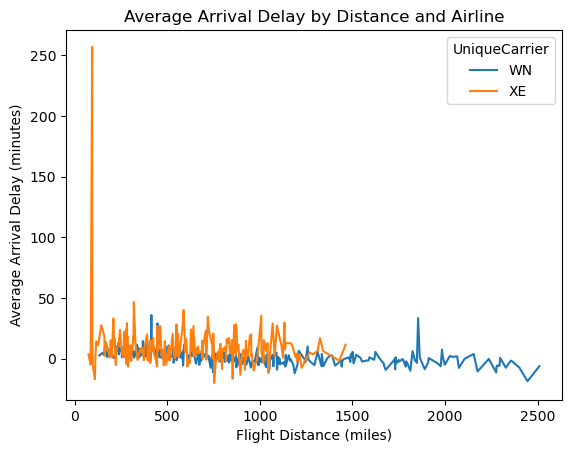

In [3]:
sns.lineplot(data=df, x="Distance", y="ArrDelay", hue="UniqueCarrier", errorbar=None)
plt.title("Average Arrival Delay by Distance and Airline")
plt.xlabel("Flight Distance (miles)")
plt.ylabel("Average Arrival Delay (minutes)")
plt.show()

## The top 10 most flown route

> The analysis of the dataset identifies the top 10 most frequently traveled routes, enabling the identification of popular destinations and the airlines operating on those routes. The findings reveal that the Houston-Dallas and Oakland-Los Angeles routes were the most commonly flown between 2007 and 2008.

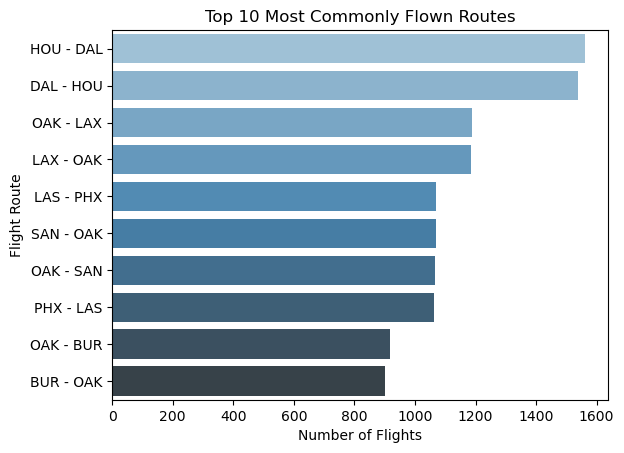

In [4]:
# group the data by the flight route and count the number of occurrences
route_counts = df.groupby(['Origin', 'Dest']).size().reset_index(name='Count')

# sort the routes in descending order by count
route_counts = route_counts.sort_values('Count', ascending=False)

# create a bar plot of the top 10 flight routes by count
sns.barplot(x=route_counts.head(10)['Count'], y=route_counts.head(10)['Origin'] + ' - ' + route_counts.head(10)['Dest'], palette='Blues_d')

# set plot title and labels
plt.title('Top 10 Most Commonly Flown Routes')
plt.xlabel('Number of Flights')
plt.ylabel('Flight Route')

# show plot
plt.show()

## The distribution of cancelled flights 
The dataset reveals the breakdown of cancelled flights, indicating that 98.5% of the flights were operational while 1.5% of the flights were cancelled.

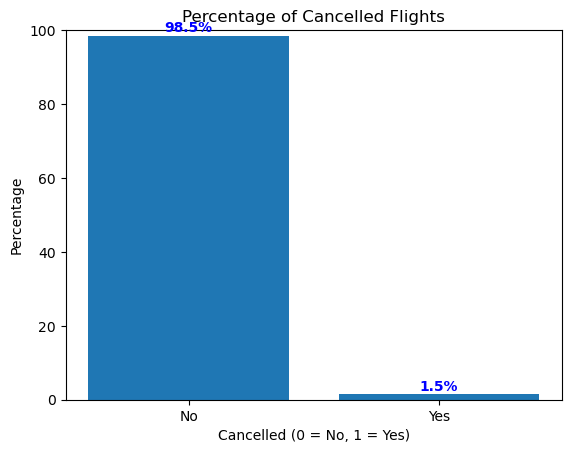

In [5]:
# Calculate percentage of cancelled flights
cancelled_pct = df['Cancelled'].value_counts(normalize=True) * 100

# Create bar plot of percentage of cancelled flights
plt.bar(cancelled_pct.index, cancelled_pct.values)
plt.title('Percentage of Cancelled Flights')
plt.xlabel('Cancelled (0 = No, 1 = Yes)')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylim(0, 100)
for i, v in enumerate(cancelled_pct.values):
    plt.text(i, v+1, f"{v:.1f}%", color='blue', fontweight='bold', ha='center')
plt.show()

## The most common reasons for flight delays
The distribution of cancelled flights in the dataset and the most common reasons for flight cancellations, which can help airlines identify areas where they need to improve their operations.The most common reason for the flight cancellation between 2007 and 2008 was carrier followed by weather.

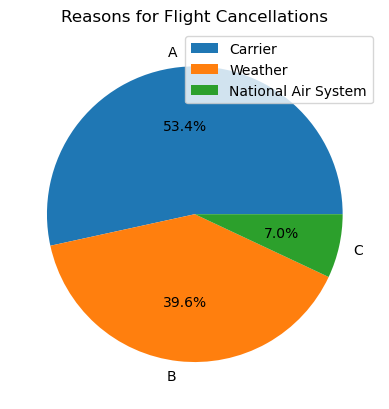

In [6]:
# group the data by cancellation code and count the number of occurrences
cancel_reasons = df[df['Cancelled'] == 1]['CancellationCode'].value_counts()

# create a pie chart
plt.pie(cancel_reasons.values, labels=cancel_reasons.index, autopct='%1.1f%%')

# add a legend with the reason descriptions
reason_labels = {'A': 'Carrier', 'B': 'Weather', 'C': 'National Air System', 'D': 'Security'}
plt.legend(cancel_reasons.index.map(reason_labels).values)

# set the plot title
plt.title('Reasons for Flight Cancellations')

# show the plot
plt.show()

## The distribution of flight cancelled by the day of the week
The bar plot illustrates the distribution of flight cancellations based on the day of the week, providing airlines with insights to plan their operations accordingly. The data reveals a correlation between the day of the week and the frequency of cancelled flights. Specifically, Wednesday had the highest number of cancelled flights between 2007 and 2008, followed by Tuesday, Thursday, and then the remaining days of the week.

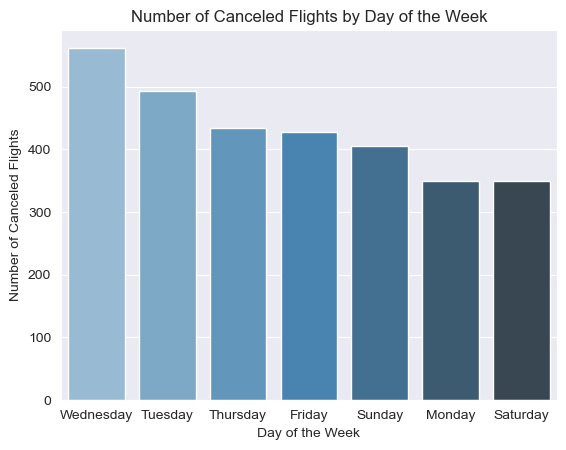

In [7]:
df_2 = pd.read_csv('cleaned_data.csv')
def plot_bar(data, xlabel, ylabel, title, palette='Blues_d'):
    sns.set_style('darkgrid')
    ax = sns.barplot(x=data.index, y=data.values, palette=palette)
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    plt.show()

cancel_counts = df_2.groupby('DayOfWeek_Name')['Cancelled'].sum().sort_values(ascending=False)
plot_bar(cancel_counts, 'Day of the Week', 'Number of Canceled Flights', 'Number of Canceled Flights by Day of the Week')

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

jupyter nbconvert --to slides --template output_toggle .ipynb --post serve


In [ ]:

!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt